In [1]:
import pandas as pd
from finvader import finvader
data = pd.read_csv('financial_phrasebank.csv',index_col=None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# use the classifier
import numpy as np
data['finvader'] = data['sentence'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")

In [3]:
# discretize compound indicator into 3 scores
conditions = [
    (data['finvader'] > 0.33),
    (data['finvader']> - 0.33) & (data['finvader'] < 0.33),
    (data['finvader'] < - 0.33)
]
values = [1, 0, -1]
data['finvader'] = np.select(conditions, values)
data

,sentence,label,finvader
0,"According to Gran , the company has no plans t...",0,0
1,Technopolis plans to develop in stages an area...,0,0
2,The international electronic industry company ...,-1,0
3,With the new production plant the company woul...,1,1
4,According to the company 's updated strategy f...,1,1
...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,-1,-1
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0,-1
4843,Operating profit fell to EUR 35.4 mn from EUR ...,-1,0
4844,Net sales of the Paper segment decreased to EU...,-1,0


In [4]:
# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)
data['finvader_correct'] = np.where((data['label'] == data['finvader']), 1, 0)
data['finvader_TP'] = np.where((data['label'] == 1) & (data['finvader'] == 1), 1, 0)
data['finvader_TN'] = np.where((data['label'] == -1) & (data['finvader'] == -1), 1, 0)
data['finvader_FP'] = np.where((data['label'] != 1) & (data['finvader'] == 1), 1, 0)
data['finvader_FN'] = np.where((data['label'] != -1) & (data['finvader'] == -1), 1, 0)

In [5]:
# print accuracy, precision, recall, F1 score
print("FinVADER accuracy is:",  round((((data['finvader_correct'].sum()) / len(data))) * 100, 2), "%")
print("FinVADER precision is:",  round((( data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum())))) * 100, 2), "%")
print("FinVADER recall is:",  round((( data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))) * 100, 2), "%")
print("FinVADER F1 score is:",  2 * round(
    (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum()))) *
      (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))))) /
     (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FP'].sum()))) +
       (((data['finvader_TP'].sum() / ((data['finvader_TP'].sum() + data['finvader_FN'].sum())))))))
     )* 100, 2), "%")

FinVADER accuracy is: 69.36 %
FinVADER precision is: 60.57 %
FinVADER recall is: 85.45 %
FinVADER F1 score is: 70.88 %


In [6]:
# baseline VADER
# discretize compound indicator into 3 scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
baseline = SentimentIntensityAnalyzer()

def sentiment_vader(sentence):

    sentiment_dict = baseline.polarity_scores(sentence)

    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] > 0.33 :
        overall_sentiment = 1

    elif sentiment_dict['compound'] < - 0.33 :
        overall_sentiment = - 1

    else :
        overall_sentiment = 0

    return overall_sentiment

In [7]:
# use the classifier
data['vader'] = data['sentence'].apply(sentiment_vader)
data

,sentence,label,finvader,finvader_correct,finvader_TP,finvader_TN,finvader_FP,finvader_FN,vader
0,"According to Gran , the company has no plans t...",0,0,1,0,0,0,0,0
1,Technopolis plans to develop in stages an area...,0,0,1,0,0,0,0,0
2,The international electronic industry company ...,-1,0,0,0,0,0,0,0
3,With the new production plant the company woul...,1,1,1,1,0,0,0,1
4,According to the company 's updated strategy f...,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,-1,-1,1,0,1,0,0,-1
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,0,-1,0,0,0,0,1,0
4843,Operating profit fell to EUR 35.4 mn from EUR ...,-1,0,0,0,0,0,0,1
4844,Net sales of the Paper segment decreased to EU...,-1,0,0,0,0,0,0,1


In [8]:
# calculate true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN)
data['vader_correct'] = np.where((data['label'] == data['vader']), 1, 0)
data['vader_TP'] = np.where((data['label'] == 1) & (data['vader'] == 1), 1, 0)
data['vader_TN'] = np.where((data['label'] == -1) & (data['vader'] == -1), 1, 0)
data['vader_FP'] = np.where((data['label'] != 1) & (data['vader'] == 1), 1, 0)
data['vader_FN'] = np.where((data['label'] != -1) & (data['vader'] == -1), 1, 0)

In [9]:
# print accuracy, precision, recall, F1 score
print("VADER accuracy is:",  round((((data['vader_correct'].sum()) / len(data))) * 100, 2), "%")
print("VADER precision is:",  round((( data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum())))) * 100, 2), "%")
print("VADER recall is:",  round((( data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))) * 100, 2), "%")
print("VADER F1 score is:",  2 * round(
    (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum()))) *
      (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))))) /
     (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FP'].sum()))) +
       (((data['vader_TP'].sum() / ((data['vader_TP'].sum() + data['vader_FN'].sum())))))))
     )* 100, 2), "%")

VADER accuracy is: 58.73 %
VADER precision is: 44.38 %
VADER recall is: 88.28 %
VADER F1 score is: 59.06 %


In [10]:
# Finvader Prediction Outcome Statistics
total_TP = data['finvader_TP'].sum()
total_TN = data['finvader_TN'].sum()
total_FP = data['finvader_FP'].sum()
total_FN = data['finvader_FN'].sum()

print(f"Total True Positives: {total_TP}")
print(f"Total True Negatives: {total_TN}")
print(f"Total False Positives: {total_FP}")
print(f"Total False Negatives: {total_FN}")

Total True Positives: 834
Total True Negatives: 274
Total False Positives: 543
Total False Negatives: 142


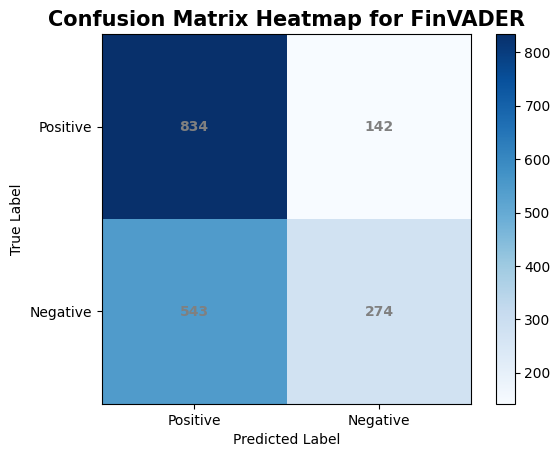

In [22]:
# Confusion Matrix for Finvader

import matplotlib.pyplot as plt
# Define confusion matrix
conf_matrix = np.array([[total_TP, total_FN], [total_FP, total_TN]]) 

# Plot heatmap
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='grey', fontsize=10, fontweight='bold')
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for FinVADER', fontsize=15, fontweight='bold')

# Customize tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])

# Show plot
plt.show()

In [17]:
# Finvader Prediction Outcome Statistics
total_TP_v = data['vader_TP'].sum()
total_TN_v = data['vader_TN'].sum()
total_FP_v = data['vader_FP'].sum()
total_FN_v = data['vader_FN'].sum()

print(f"Total True Positives: {total_TP_v}")
print(f"Total True Negatives: {total_TN_v}")
print(f"Total False Positives: {total_FP_v}")
print(f"Total False Negatives: {total_FN_v}")

Total True Positives: 723
Total True Negatives: 87
Total False Positives: 906
Total False Negatives: 96


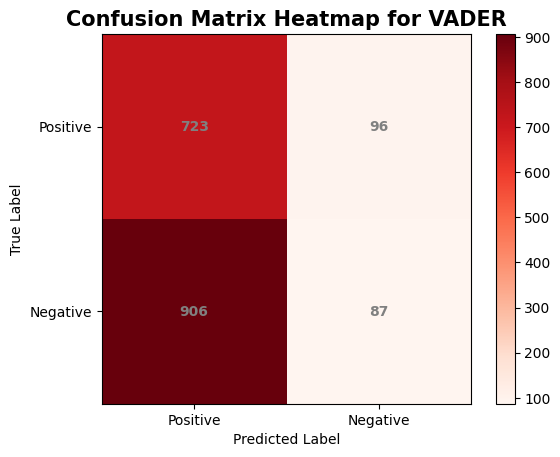

In [23]:
# Confusion Matrix for Vader

import matplotlib.pyplot as plt
# Define confusion matrix
conf_matrix = np.array([[total_TP_v, total_FN_v], [total_FP_v, total_TN_v]]) 

# Plot heatmap
plt.imshow(conf_matrix, cmap='Reds', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='grey', fontsize=10, fontweight='bold')
# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for VADER', fontsize=15, fontweight='bold')

# Customize tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])

# Show plot
plt.show()